# 1.Import libraries & load data

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
df1=pd.read_csv("Copy of events.csv")
df2=pd.read_csv("Copy of gender_age.csv")
df3=pd.read_csv("Copy of phone_device.csv")

In [3]:
df1.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [4]:
df2.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [5]:
df3.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [6]:
df=pd.merge(pd.merge(df1,df2,on='device_id'),df3,on='device_id')

In [7]:
df.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+,小米,红米note
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+,小米,红米note
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+,小米,红米note
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+,小米,红米note
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+,小米,红米note


In [8]:
df.size

12204740

In [9]:
df.shape

(1220474, 10)

In [ ]:
df.info()

# 2.Data cleansing & EDA

In [11]:
#drop duplicates
df.drop_duplicates(subset=None,keep='first')

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+,小米,红米note
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+,小米,红米note
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+,小米,红米note
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+,小米,红米note
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+,小米,红米note
...,...,...,...,...,...,...,...,...,...,...
1220469,3249513,4374492668099697484,2016-05-07 21:46:56,0.00,0.00,M,18,M22-,联想,S90-t
1220470,3249757,-348628281270381461,2016-05-01 22:22:39,0.00,0.00,M,21,M22-,乐视,超级手机1
1220471,3250919,-634925280832154541,2016-05-06 22:09:44,0.00,0.00,M,49,M39+,OPPO,Find 7
1220472,3251114,2390927717095168323,2016-05-07 22:49:00,0.00,0.00,M,26,M23-26,魅族,魅蓝2


In [12]:
df.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [13]:
df.describe()

,event_id,device_id,longitude,latitude,age
count,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06,1.220474e+06
mean,1.626750e+06,-3.113463e+16,7.841065e+01,2.183423e+01,3.348649e+01
std,9.396839e+05,5.320454e+18,5.381275e+01,1.564637e+01,9.738525e+00
min,1.000000e+00,-9.222957e+18,-1.800000e+02,-3.380000e+01,1.100000e+01
25%,8.123500e+05,-4.667940e+18,0.000000e+00,0.000000e+00,2.700000e+01
50%,1.627414e+06,-1.250469e+17,1.127700e+02,2.857000e+01,3.100000e+01
75%,2.440480e+06,4.631837e+18,1.171600e+02,3.408000e+01,3.900000e+01
max,3.252948e+06,9.220915e+18,1.511800e+02,5.364000e+01,8.900000e+01


In [14]:
## dropping redundant columns which are not useful for model buidling
df.drop('event_id',axis=1,inplace=True)
df.drop('device_id',axis=1,inplace=True)
df.drop('timestamp',axis=1,inplace=True)

In [15]:
df.head()

,longitude,latitude,gender,age,group,phone_brand,device_model
0,121.38,31.24,M,46,M39+,小米,红米note
1,121.38,31.24,M,46,M39+,小米,红米note
2,121.39,31.23,M,46,M39+,小米,红米note
3,121.38,31.24,M,46,M39+,小米,红米note
4,121.16,31.00,M,46,M39+,小米,红米note


# Encoding

In [16]:
le=LabelEncoder()

In [17]:
df.gender=le.fit_transform(df.gender)

In [18]:
df.group=le.fit_transform(df.group)

In [19]:
df.phone_brand=le.fit_transform(df.phone_brand)

In [20]:
df.device_model=le.fit_transform(df.device_model)

In [21]:
df.head()

,longitude,latitude,gender,age,group,phone_brand,device_model
0,121.38,31.24,1,46,11,34,864
1,121.38,31.24,1,46,11,34,864
2,121.39,31.23,1,46,11,34,864
3,121.38,31.24,1,46,11,34,864
4,121.16,31.00,1,46,11,34,864


# 3.Data Preparation for model building

In [22]:
## Lets create a copy of the original dataframe and name the copy as df_scaled
df_scaled = df.copy()

In [23]:
## Standardize the data using standard scalar
ss = StandardScaler()

df_scaled.iloc[:,:] = ss.fit_transform(df_scaled.iloc[:,:])

In [24]:
df_scaled.head(2)

,longitude,latitude,gender,age,group,phone_brand,device_model
0,0.798498,0.601147,0.636552,1.284949,1.148848,0.229044,0.931297
1,0.798498,0.601147,0.636552,1.284949,1.148848,0.229044,0.931297


# 4.K-means & agglomerative clustering

In [25]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

In [26]:
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

In [27]:
clusters_df

,num_clusters,cluster_errors
0,1,8.543318e+06
1,2,6.215800e+06
2,3,4.825072e+06
3,4,4.098284e+06
4,5,3.583516e+06
5,6,3.191518e+06
6,7,2.913064e+06
7,8,2.630506e+06
8,9,2.420905e+06
9,10,2.240442e+06


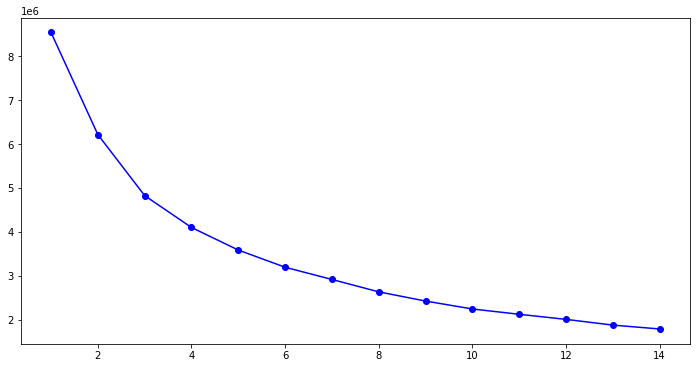

In [28]:
## Elbow plot
plt.figure(figsize=[12,6])
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [ ]:
# here elbow plot drops significantly at 3, so no. of clusters=3

In [29]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [30]:
## obtained labels from kmeans clustering
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [31]:
## Creating a new dataframe only for labels and converting it into categorical variables.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))

df_labels.head(5)

,Labels
0,1
1,1
2,1
3,1
4,1


In [33]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_kmeans = df.join(df_labels)

df_kmeans.head()

,longitude,latitude,gender,age,group,phone_brand,device_model,Labels
0,121.38,31.24,1,46,11,34,864,1
1,121.38,31.24,1,46,11,34,864,1
2,121.39,31.23,1,46,11,34,864,1
3,121.38,31.24,1,46,11,34,864,1
4,121.16,31.00,1,46,11,34,864,1


In [34]:
df_kmeans['Labels'].value_counts()

1    608096
2    387423
0    224955
Name: Labels, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    print(i,silhouette_score(df_scaled,labels))

# PCA

In [ ]:
## separate target and independent variables
X = df.drop('phone_brand',axis=1)
y = df['phone_brand']

In [ ]:
## standardizing the data using standard scalar
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head(2)

In [ ]:
cov_matrix = np.cov(X_scaled.T)
print('Covariance matrix','\n',cov_matrix)

In [ ]:
sns.pairplot(X_scaled)
plt.show()

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [ ]:
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

In [ ]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

In [ ]:
plt.bar(range(4),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(4), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

In [ ]:
## separate target and independent features
X = df.drop('phone_brand',axis=1)
y = df['phone_brand']

## split the datatset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## scale the independent features using standard scalar
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)

In [ ]:
y_train_pred = knn.predict(X_train_pca)
y_test_pred = knn.predict(X_test_pca)

## lets check the accuracy for train and test data
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,y_train_pred))
print('test accuracy:',accuracy_score(y_test,y_test_pred))

# 5.Conclusion

Clustering is the task of segregating the population or data points into a different number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. 
In simple words,it is used to segregate groups with similar traits and assign them into clusters.